# Understanding Descriptive Statistics

Import the necessary libraries here:

In [1]:
# Libraries
import pandas as pd
import numpy as np
from random import choice
import matplotlib.pyplot as plt

## Challenge 1
#### 1.- Define a function that simulates rolling a dice 10 times. Save the information in a dataframe.
**Hint**: you can use the *choices* function from module *random* to help you with the simulation.

In [5]:
def rolling (rolls = 10):
    roll_list = []
    
    for i in range(rolls):
        x = choice(range(1, 7))
        roll_list.append(x) # LONG LIVE THE APPEND.
        
    return pd.DataFrame({"Rolls": roll_list})

db = rolling()
db

,Rolls
0,3
1,4
2,3
3,5
4,6
5,6
6,3
7,6
8,1
9,1


#### 2.- Plot the results sorted by value.

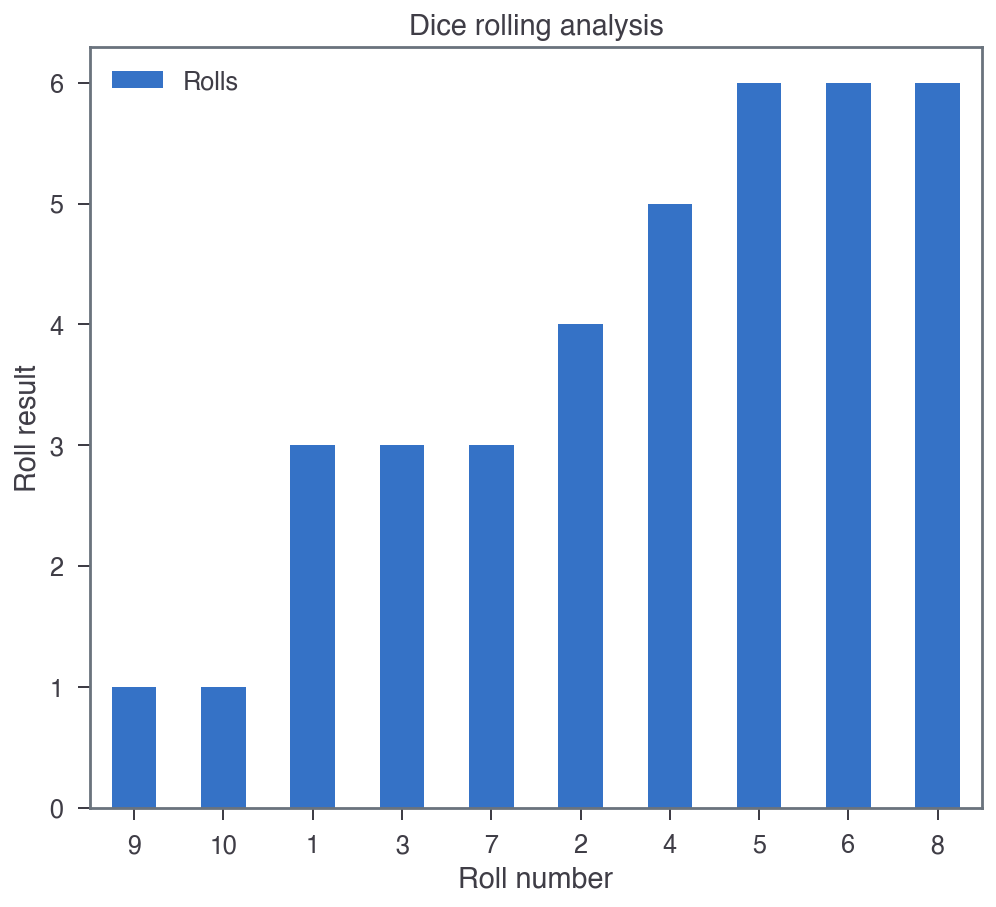

In [11]:
# your code here
db.sort_values(['Rolls'], inplace = True)

# Just to normalize the index and make it more 'real' since the turns of the dice 
# go from 1-10 and not 0-9
db.index += 1
# Maybe I shouldn't reset the index, I guess, to not lose the dice-throwing order?

bar_plot = db.plot(kind = 'bar', rot = 0, title = 'Dice rolling analysis');
bar_plot.set_xlabel('Roll number');
bar_plot.set_ylabel('Roll result');

#### 3.- Calculate the frequency distribution and plot it. What is the relation between this plot and the plot above? Describe it with words.

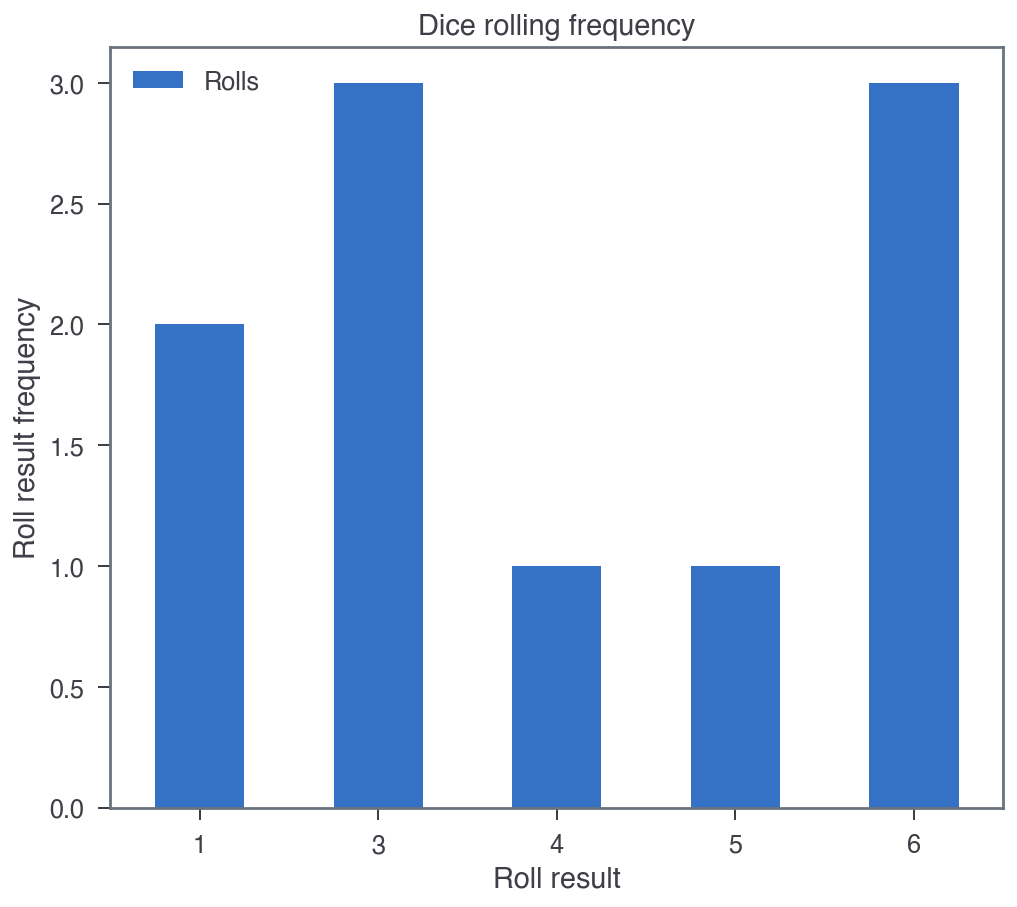

In [15]:
# your code here
frequency = db.groupby('Rolls').agg({'Rolls': 'count'})
frequency

freq = frequency.plot(kind = 'bar', rot = 0, title = 'Dice rolling frequency');
freq.set_xlabel('Roll result');
freq.set_ylabel('Roll result frequency');

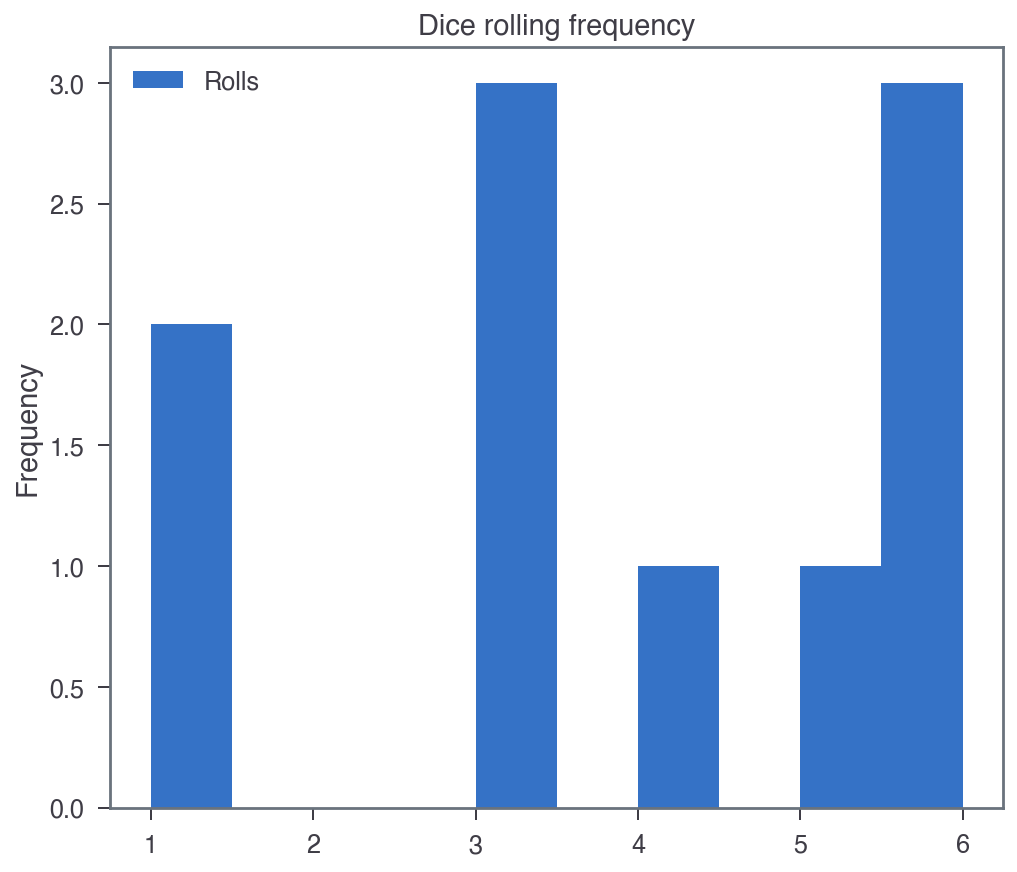

In [16]:
# I guess I could've just done a histogram like this and be done with it. But the barplot looks better
# and more spaced out. I don't like this 5-6 being glued like that
db.plot(kind = 'hist', rot = 0, title = 'Dice rolling frequency');

In [ ]:
"""
In the first plot we can see the results for each of the 10 dice rolls the player did.
On the second plot, we can see the frequency (# of times) of each of the results of the 10 rolls.
"""

## Challenge 2
Now, using the dice results obtained in *challenge 1*, your are going to define some functions that will help you calculate the mean of your data in two different ways, the median and the four quartiles. 

#### 1.- Define a function that computes the mean by summing all the observations and dividing by the total number of observations. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [43]:
# your code here
def my_mean(series):
    return sum(series) / len(series)

my_mean(db['Rolls'])

3.8

#### 2.- First, calculate the frequency distribution. Then, calculate the mean using the values of the frequency distribution you've just computed. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [50]:
# Frequency was already defined a few cells above. It was the groupby with an agg doing a count to get
# the frequency of the rolls
mean = my_mean(frequency['Rolls'])
mean


2.0

#### 3.- Define a function to calculate the median. You are not allowed to use any methods or functions that directly calculate the median value. 
**Hint**: you might need to define two computation cases depending on the number of observations used to calculate the median.

In [195]:
def my_median(series):
    
    # Turning the Pandas' Series into a list, otherwise it won't work
    series = list(series)
    
    # Sorting and getting the length
    series.sort()
    length = len(series)
    
    # Checking if the length is even and getting the positions to then do the mean
    if length % 2 == 0:
        median1 = series[length // 2] 
        median2 = series[length // 2 - 1] 
        median = (median1 + median2) / 2
    
    # If it's not an even length, just get the value in the middle
    else: 
        median = series[length // 2]
    
    # Returning the final result        
    return median
    
print('Median is:', my_median(db['Rolls']))

Median is: 3.5


#### 4.- Define a function to calculate the four quartiles. You can use the function you defined above to compute the median but you are not allowed to use any methods or functions that directly calculate the quartiles. 

In [198]:
# your code here
# whyyyyyyyyyyyy???

# stackoverflow!!!!!!

def find_median(sorted_list):
    indices = []
    
    sorted_list = list(sorted_list) # just added this to make it for for a Pandas' Series
    
    list_size = len(sorted_list)
    median = 0

    if list_size % 2 == 0:
        indices.append(int(list_size / 2) - 1)  # -1 because index starts from 0
        indices.append(int(list_size / 2))

        median = (sorted_list[indices[0]] + sorted_list[indices[1]]) / 2
        pass
    else:
        indices.append(int(list_size / 2))

        median = sorted_list[indices[0]]
        pass

    return median, indices
    pass

median, median_indices = find_median(db['Rolls'])
Q1, Q1_indices = find_median(db['Rolls'][:median_indices[0]])
Q2, Q2_indices = find_median(db['Rolls'][median_indices[-1] + 1:])

quartiles = [Q1, median, Q2]

# Actually matches my median above, nice.
print("(Q1, median, Q3): {}".format(quartiles))

(Q1, median, Q3): [2.0, 3.5, 6.0]


## Challenge 3
Read the csv `roll_the_dice_hundred.csv` from the `data` folder.
#### 1.- Sort the values and plot them. What do you see?

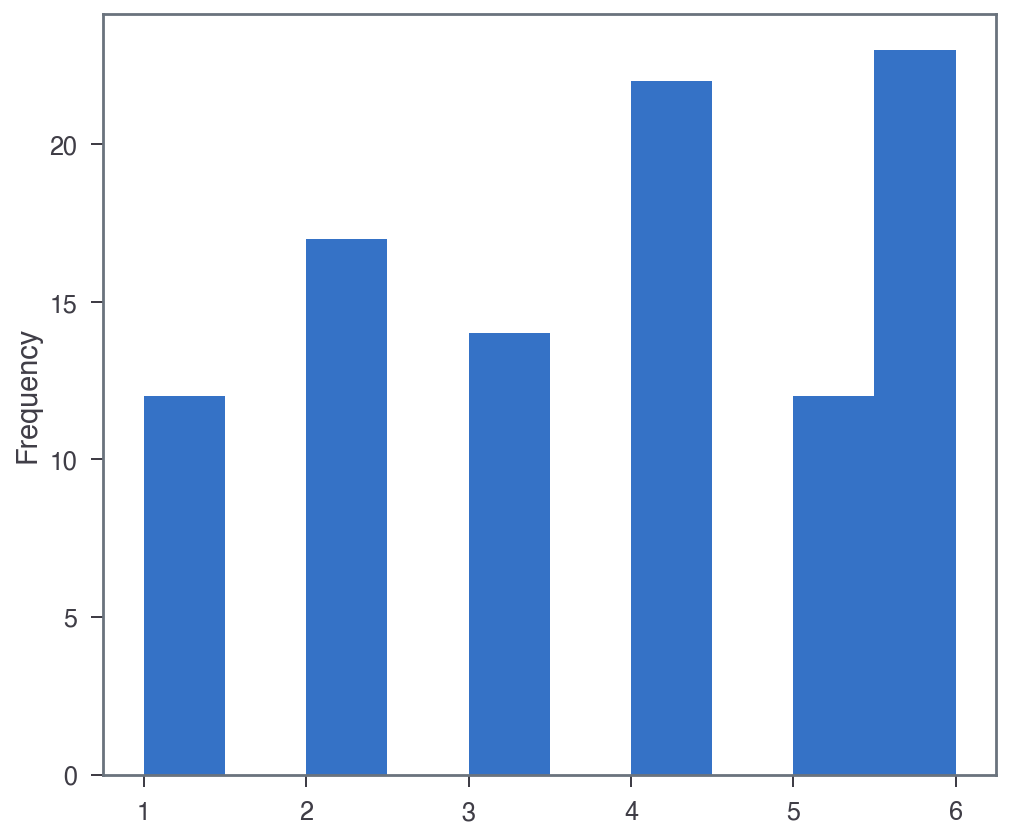

In [141]:
# Reading the dataset
dice = pd.read_csv('../data/roll_the_dice_hundred.csv')

# Sorting the values' column
dice.sort_values('value', inplace = True)

# Plotting it
dice['value'].plot(kind = 'hist');

In [ ]:
"""
I see the frequency of each possible roll. Nothing else.
"""

#### 2.- Using the functions you defined in *challenge 2*, calculate the mean value of the hundred dice rolls.

In [142]:
# your code here
my_mean(dice['value'])

3.74

#### 3.- Now, calculate the frequency distribution.


In [145]:
frequency = dice.groupby('value').agg({'value': 'count'})
frequency.rename(columns = {'value': 'frequency'}, inplace = True)
frequency

,frequency
value,
1,12
2,17
3,14
4,22
5,12
6,23


#### 4.- Plot the histogram. What do you see (shape, values...) ? How can you connect the mean value to the histogram? 

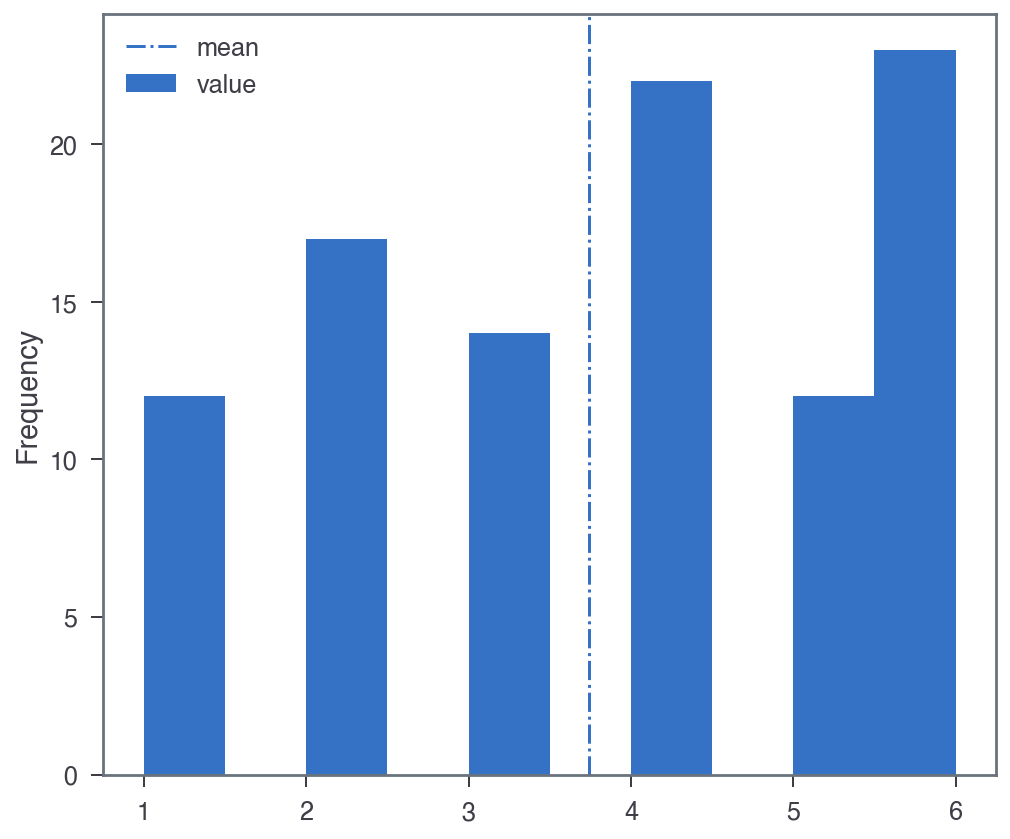

In [159]:
# Was I not supposed to have used the histogram earlier?

# If I just say 'mean' without defining it before it still gives me a line but at like value 2?
mean = my_mean(dice['value']) # using my handy dandy little function that will never
# see the light of day again outside this lab

dice['value'].plot(kind = 'hist'); # doing same old hist as before
plt.axvline(mean, label = 'mean', linestyle = 'dashdot') # I connected it like this, by adding the line
plt.legend()

In [ ]:
"""
I see the same as before, the frequency of the rolls, and now with a line symbolizing the mean.
"""

#### 5.- Read the `roll_the_dice_thousand.csv` from the `data` folder. Plot the frequency distribution as you did before. Has anything changed? Why do you think it changed?

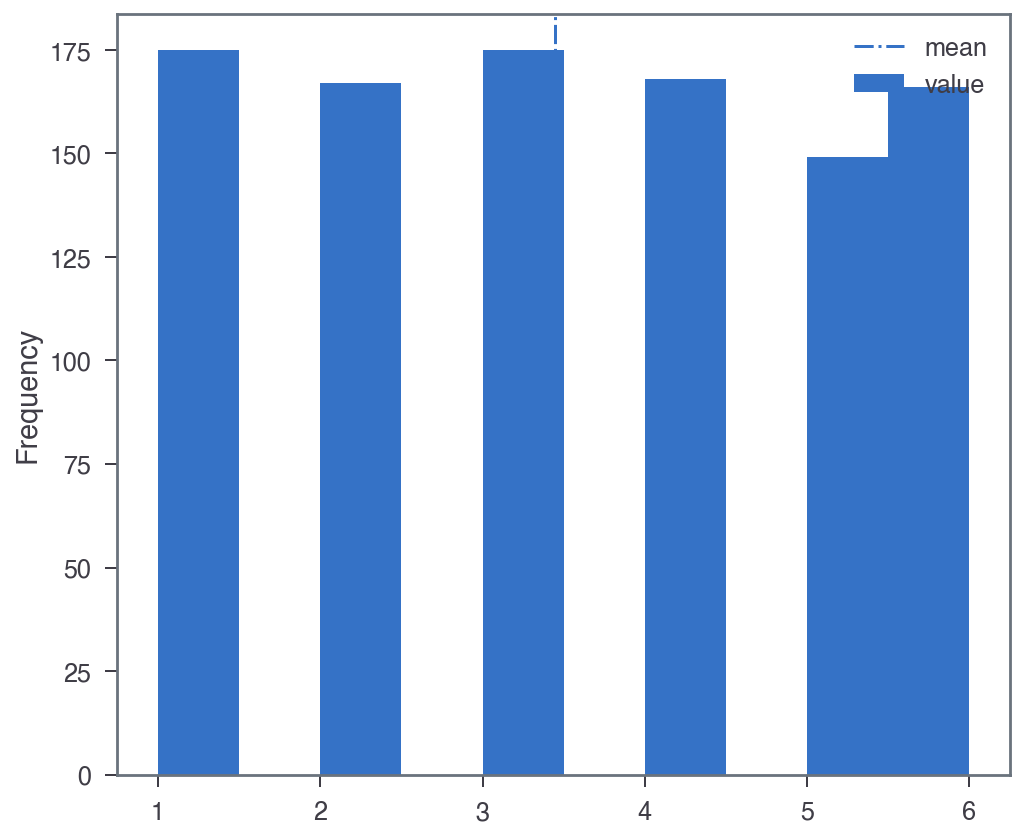

In [165]:
dice_thousand = pd.read_csv('../data/roll_the_dice_thousand.csv')

mean = my_mean(dice_thousand['value'])

dice_thousand['value'].plot(kind = 'hist');
plt.axvline(mean, label = 'mean', linestyle = 'dashdot');
plt.legend();

In [ ]:
"""
The distribution seems much more uniform now, which makes sense, as there are one thousand rolls in
this file, and a die only has 6 sides, so it is expected that things kinda average out and look
the same.
"""

## Challenge 4
In the `data` folder of this repository you will find three different files with the prefix `ages_population`. These files contain information about a poll answered by a thousand people regarding their age. Each file corresponds to the poll answers in different neighbourhoods of Barcelona.

#### 1.- Read the file `ages_population.csv`. Calculate the frequency distribution and plot it as we did during the lesson. Try to guess the range in which the mean and the standard deviation will be by looking at the plot. 

In [206]:
# Reading the dataset
ages = pd.read_csv('../data/ages_population.csv')

# Getting the frequency
frequency = ages.groupby('observation').agg({'observation': 'count'})
frequency.rename(columns = {'observation': 'frequency'}, inplace = True)
frequency

,frequency
observation,
1.0,2
2.0,2
4.0,1
5.0,2
6.0,2
...,...
69.0,1
70.0,1
71.0,1


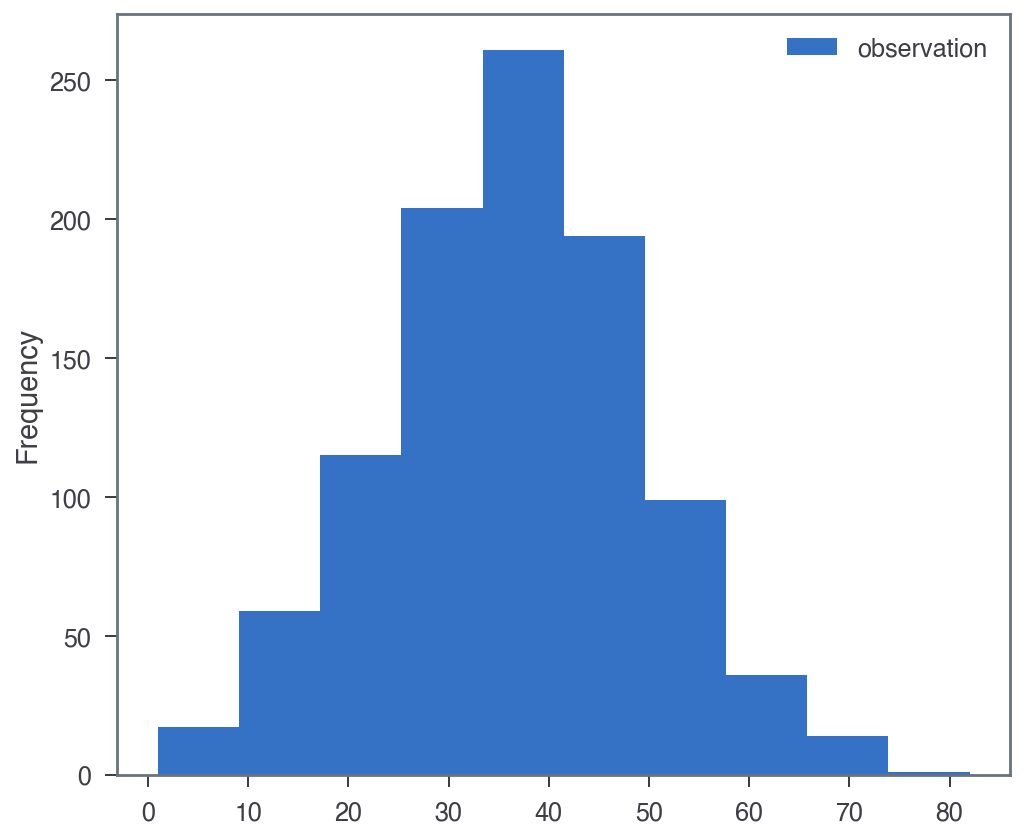

In [217]:
ages.plot(kind = 'hist');

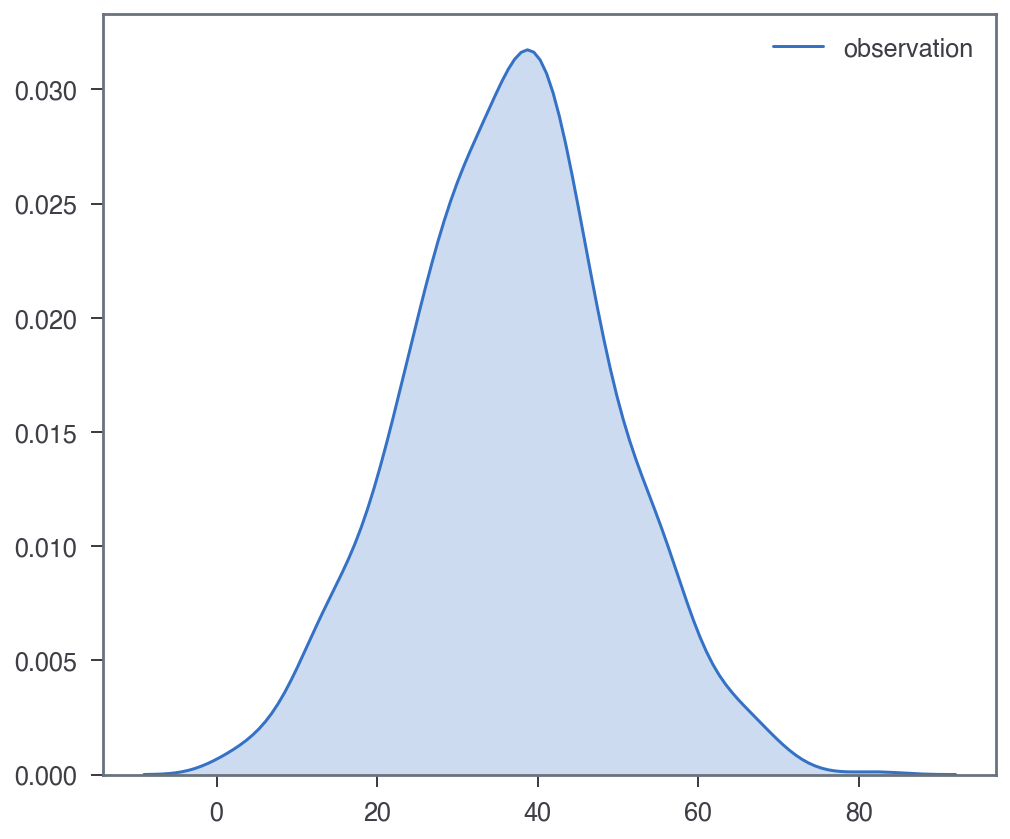

In [233]:
# Doesn't this plot look super cool? I'm the only one who uses it! :3
# Yes, I know distplot also gives the distrib plus that dist line. But I like this one :x
sns.kdeplot(ages['observation'], shade = True);

In [ ]:
'''
Ok, anyway, the mean is probably around 35-40, I guess? And by using the 68-95-99,7% rule, the std
would be around 13.5?
'''

#### 2.- Calculate the exact mean and standard deviation and compare them with your guesses. Do they fall inside the ranges you guessed?

In [237]:
# your code here
print('Mean:', ages.mean())
print('')
print('STD:', ages.std())

Mean: observation    36.56
dtype: float64

STD: observation    12.8165
dtype: float64


In [ ]:
"""
Yes, they do fall inside the ranges that I guessed. Nice :x
"""

#### 3.- Now read the file `ages_population2.csv` . Calculate the frequency distribution and plot it.

In [241]:
ages_2 = pd.read_csv('../data/ages_population2.csv')

# Getting the frequency
frequency_2 = ages_2.groupby('observation').agg({'observation': 'count'})
frequency_2.rename(columns = {'observation': 'frequency'}, inplace = True)
frequency_2

,frequency
observation,
19.0,3
20.0,13
21.0,17
22.0,35
23.0,41
24.0,78
25.0,98
26.0,120
27.0,125


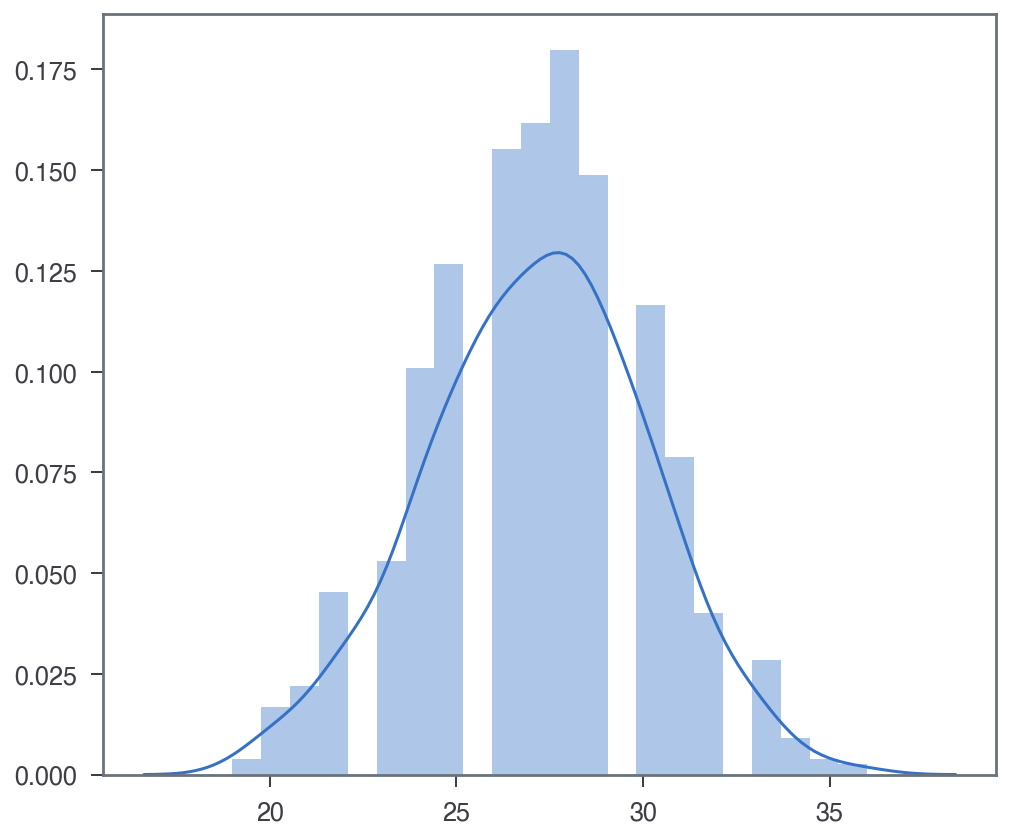

In [270]:
# Plotting
#ages_2.plot(kind = 'hist');
sns.distplot(ages_2);

####  4.- What do you see? Is there any difference with the frequency distribution in step 1?

In [ ]:
"""
Well, the range is much less than the first sample, so the STD will probably be less too?
Following the same rule as before, the STD will be around 2.8, I suppose.
Mean is around 26-28 probably.
"""

#### 5.- Calculate the mean and standard deviation. Compare the results with the mean and standard deviation in step 2. What do you think?

In [258]:
# your code here
print('Mean:', ages_2.mean())
print('')
print('STD:', ages_2.std())

Mean: observation    27.155
dtype: float64

STD: observation    2.969814
dtype: float64


In [ ]:
"""
My guesses were correct.
"""

## Challenge 5
Now is the turn of `ages_population3.csv`.

#### 1.- Read the file `ages_population3.csv`. Calculate the frequency distribution and plot it.

In [260]:
# your code here
ages_3 = pd.read_csv('../data/ages_population3.csv')

# Getting the frequency
frequency_3 = ages.groupby('observation').agg({'observation': 'count'})
frequency_3.rename(columns = {'observation': 'frequency'}, inplace = True)
frequency_3

,frequency
observation,
1.0,2
2.0,2
4.0,1
5.0,2
6.0,2
...,...
69.0,1
70.0,1
71.0,1


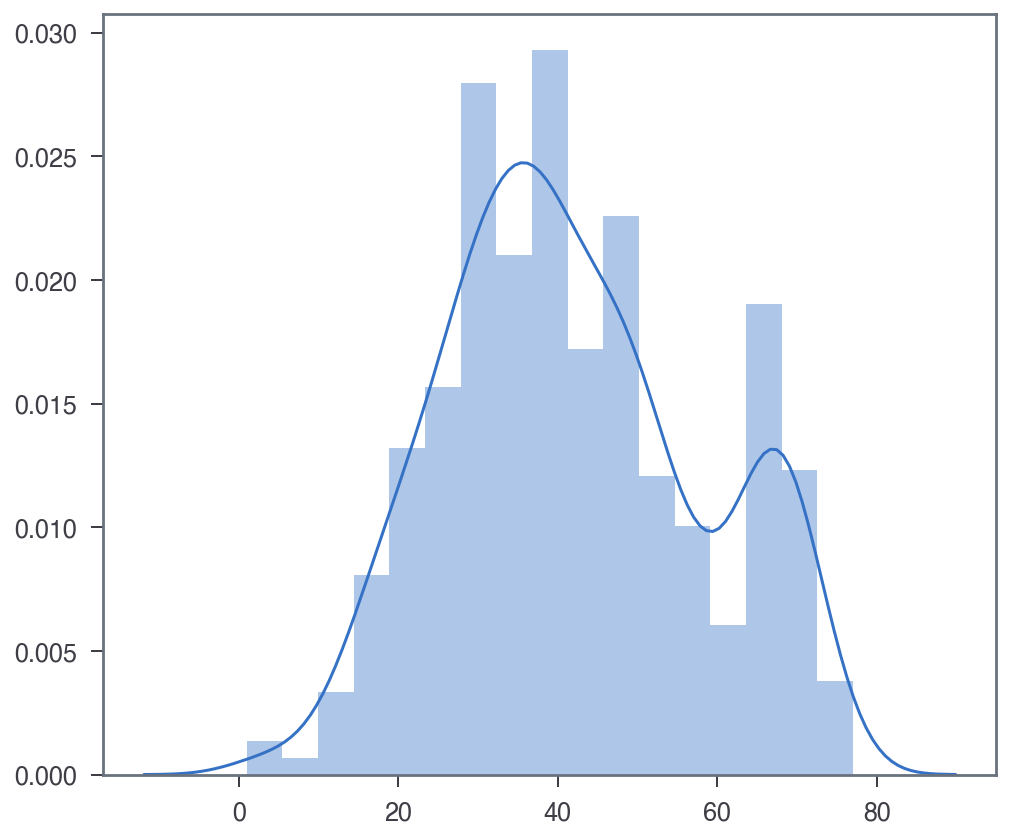

In [271]:
# Plotting
sns.distplot(ages_3);

#### 2.- Calculate the mean and standard deviation. Compare the results with the plot in step 1. What is happening?

In [272]:
# your code here
print('Mean:', ages_3.mean())
print('')
print('STD:', ages_3.std())

Mean: observation    41.989
dtype: float64

STD: observation    16.144706
dtype: float64


In [ ]:
"""
What is happening is that this sample is much less coherent, kinda looks like it's a bit bi-modal
as there are 2 humps in the plot? The distribution isn't that normal, it seems, it's not very
well-distributed.
The mean is higher and so is the STD, because the data is more spread out, also 'cause the
concentration of ages around 65.
"""

#### 3.- Calculate the four quartiles. Use the results to explain your reasoning for question in step 2. How much of a difference is there between the median and the mean?

In [279]:
# your code here
# When you ask us to do this, can we just do a .describe()?
print(ages_3.quantile(0.25))
print('')
print(ages_3.quantile(0.5))
print('')
print(ages_3.quantile(0.75))
print('')
print(ages_3.quantile(1))

# It looks so much better and easier to read. Also gives more useuful info.
ages_3.describe()

observation    30.0
Name: 0.25, dtype: float64

observation    40.0
Name: 0.5, dtype: float64

observation    53.0
Name: 0.75, dtype: float64

observation    77.0
Name: 1, dtype: float64


,observation
count,1000.000000
mean,41.989000
std,16.144706
min,1.000000
25%,30.000000
50%,40.000000
75%,53.000000
max,77.000000


In [ ]:
"""
There isn't much difference between the median and the mean, they are 41-40.
"""

#### 4.- Calculate other percentiles that might be useful to give more arguments to your reasoning.

In [280]:
# your code here
ages_3.quantile([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])

,observation
0.0,1.0
0.1,22.0
0.2,28.0
0.3,32.0
0.4,36.0
0.5,40.0
0.6,45.0
0.7,50.0
0.8,57.0
0.9,67.0


In [ ]:
"""
We can see there is a lot of data still from 70-1, like the quartiles above suggested, as well as 
the plot.
"""

## Bonus challenge
Compare the information about the three neighbourhoods. Prepare a report about the three of them. Remember to find out which are their similarities and their differences backing your arguments in basic statistics.

In [ ]:
# your code here

In [ ]:
"""
your comments here
"""